In [2]:
# Importing the libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [3]:
dataset = pd.read_excel('EVT5_spectra_split.xlsx')
dataset.head(10)


,Sample ID,Set,Protein,Type,Species,1350.1554633964,1351.3973965151,1352.6416148041,1353.8881279906,1355.1369390092,...,2510.7786684154,2515.0769064023,2519.3898919675,2523.717689278,2528.0603866696,2532.4180492784,2536.7907665812,2541.1786047003,2545.5816542731,2549.9999824259
0,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.169254,0.167321,0.165425,0.163565,0.162072,...,0.686664,0.689297,0.691657,0.693550,0.695463,0.697398,0.699150,0.700870,0.702606,0.704471
1,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.169391,0.167380,0.165408,0.163472,0.161911,...,0.684657,0.687524,0.690261,0.692762,0.695290,0.697846,0.699923,0.701897,0.703890,0.705881
2,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.176566,0.174362,0.172200,0.170079,0.168349,...,0.680052,0.682921,0.685514,0.687635,0.689779,0.691946,0.693950,0.695928,0.697926,0.700044
3,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.176837,0.174546,0.172298,0.170093,0.168304,...,0.679376,0.682056,0.684601,0.686902,0.689228,0.691578,0.693681,0.695737,0.697814,0.699912
4,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.166206,0.164299,0.162428,0.160592,0.159083,...,0.674230,0.676829,0.679354,0.681733,0.684138,0.686568,0.689045,0.691552,0.694084,0.696683
5,16LF-R-FM-G2,Training,5.99,Finger millet,Finger millet,0.166478,0.164532,0.162624,0.160751,0.159161,...,0.673562,0.675911,0.678199,0.680363,0.682551,0.684763,0.687059,0.689394,0.691752,0.694230
6,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.151319,0.149358,0.147433,0.145543,0.143950,...,0.653663,0.655557,0.657347,0.658953,0.660576,0.662216,0.664217,0.666321,0.668445,0.670738
7,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.172373,0.170388,0.168440,0.166528,0.164949,...,0.659549,0.661743,0.663879,0.665900,0.667942,0.670006,0.672190,0.674417,0.676666,0.678961
8,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.172587,0.170521,0.168493,0.166502,0.164813,...,0.658371,0.660874,0.663224,0.665307,0.667411,0.669539,0.671342,0.673077,0.674827,0.676639
9,16LF-R-FM-G15,Validation,6.76,Finger millet,Finger millet,0.154262,0.152433,0.150638,0.148877,0.147397,...,0.670284,0.672511,0.674733,0.676927,0.679144,0.681385,0.683750,0.686162,0.688598,0.691106


In [4]:
pwd

'C:\\Users\\Admin\\Python\\Scripts'

In [5]:
x = dataset.drop(['Sample ID','Protein','Set','Type','Species'], axis = 1) # Features
y = dataset['Protein']  # Target

In [6]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 28)

In [7]:
# Standardize the features
scaler = StandardScaler()
scaler2 = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler2.fit_transform(x_test)

In [8]:
pca = PCA(n_components=100)  # Retain all components
x_pca = pca.fit_transform(x_train_scaled)

In [9]:
x_test_pca = pca.transform(x_test_scaled)


In [10]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [9.56630425e-01 2.78328362e-02 9.00296844e-03 2.64063744e-03
 2.21835833e-03 6.27563401e-04 3.98528713e-04 2.08587350e-04
 1.82178845e-04 8.21637703e-05 4.15412444e-05 2.46745600e-05
 2.28521397e-05 1.23855582e-05 1.01180818e-05 7.25241164e-06
 6.52313518e-06 4.75021090e-06 3.29239214e-06 3.18912996e-06
 2.77414187e-06 2.67148464e-06 2.09570941e-06 2.00453790e-06
 1.73079844e-06 1.70526630e-06 1.62078768e-06 1.49497872e-06
 1.47071579e-06 1.40170322e-06 1.34150098e-06 1.29002256e-06
 1.24427043e-06 1.19957054e-06 1.09418316e-06 1.01712762e-06
 9.04436433e-07 8.97375681e-07 8.23471732e-07 7.78271698e-07
 7.41619232e-07 6.93589447e-07 6.70638557e-07 6.26250934e-07
 5.69248321e-07 5.09649323e-07 4.66627559e-07 4.40850771e-07
 4.13402723e-07 3.77623294e-07 3.40858935e-07 3.36953333e-07
 3.26556168e-07 3.15479881e-07 2.92289550e-07 2.56218697e-07
 2.53964254e-07 2.36505776e-07 2.21147479e-07 1.98495109e-07
 1.85507077e-07 1.65217006e-07 1.59230159e-07 1.52723000e-0

In [11]:
k_folds = 10

# Initialize the KFold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


In [12]:
# Create and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(x_pca, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42)

In [13]:
cv_results = cross_val_score(gb_regressor, x_pca, y_train, cv=kf)

    

In [14]:
# Print the results
print("Cross-validation scores:", cv_results)
print("Mean CV score:", np.mean(cv_results))

Cross-validation scores: [0.86890416 0.8309078  0.86931651 0.81917393 0.85915888 0.86252046
 0.84084057 0.85067169 0.80761309 0.81547101]
Mean CV score: 0.8424578101284684


In [15]:
best_model = gb_regressor 

In [16]:
# Predicting the target values of the test set
y_pred_train = best_model.predict(x_pca)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_train, y_pred_train)
print(f'R² Score: {r2}')


RMSE:  0.36
R² Score: 0.9877819883132215


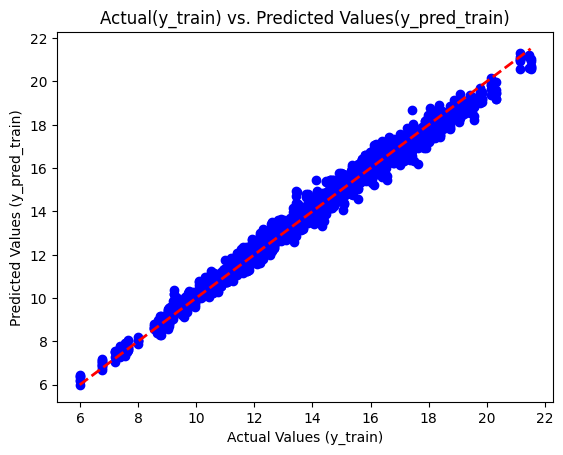

In [17]:
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual(y_train) vs. Predicted Values(y_pred_train)')
plt.show()

In [18]:
# Predicting the target values of the test set
y_pred = best_model.predict(x_test_pca)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


RMSE:  1.362
R² Score: 0.8078307200975009


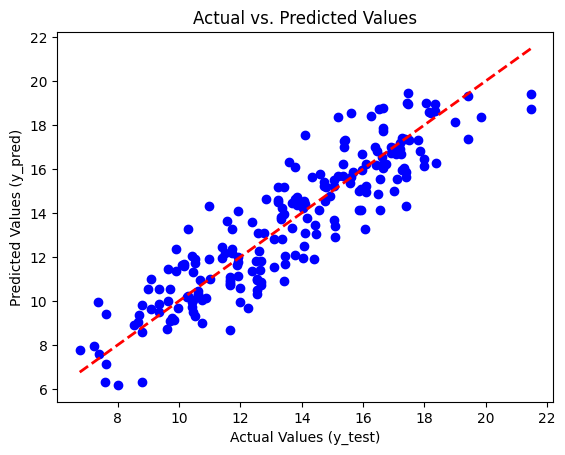

In [19]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [20]:
df3=pd.DataFrame(y_pred_train)
df4=pd.DataFrame(y_pred)
df5=pd.DataFrame(y_train)
df6=pd.DataFrame(y_test)

In [21]:
df3.to_excel('y_pred_train3.xlsx', index=False) 
df4.to_excel('y_pred_test3.xlsx', index=False) 
df5.to_excel('y_train3.xlsx', index=False) 
df6.to_excel('y_test3.xlsx', index=False) 


In [22]:
import pickle
pickle.dump(best_model,open('new.pkl','wb'))

In [23]:
df1=pd.DataFrame(x_pca)
df2=pd.DataFrame(x_test_pca)
df1.to_excel('train3.xlsx', index=False) 
df2.to_excel('test3.xlsx', index=False) 